<a href="https://colab.research.google.com/github/shernee/04_cmpe258/blob/main/3layer_NN_Pytorch_builtin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from typing import Callable
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import torch
import torch.nn as nn

In [ ]:
# initialize input parameters
n = 150
d = 3

# initialize random input data, weights and bias
x = torch.rand(n, d).float()
weights_true = torch.tensor([[3.0, -2.0, 4.0], ]).T
bias_true = torch.tensor([[1.8]])

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}')

# non-linear equation
y_true = torch.einsum('ij, jk -> ik', (x**3), weights_true) + torch.einsum('ij, jk -> ik', (x**2), weights_true) - torch.einsum('ij, jk -> ik', x, weights_true) + bias_true

print(f'y: {y_true.shape}')

x: torch.Size([150, 3]), weights: torch.Size([3, 1]), bias: torch.Size([1])
y: torch.Size([150, 1])


In [ ]:
# class for our entire non-linear model

class Model(nn.Module):
  def __init__(self, input_dim: int, hidden_dim: int, output_dim: int = 1):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, hidden_dim)
    self.relu1 = nn.ReLU()
    self.linear2 = nn.Linear(hidden_dim, hidden_dim)
    self.relu2 = nn.ReLU()
    self.linear3 = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3

In [ ]:
# fit method for training of the model

def torch_fit(x: np.ndarray, y_true:np.ndarray, model: Callable, loss: Callable, optimizer: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    optimizer.zero_grad()  
    y_predicted = model(x=x)
    loss_value = loss(y_predicted, y_true)
    print(f'Epoch: {epoch}; Loss Value: {loss_value}')
    loss_value.backward()
    optimizer.step()

In [ ]:
# initialize model parameters
input_dim = d
hidden_dim = 10
output_dim = 1
lr = 0.1
num_epochs = 40

model = Model(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

torch_fit(x=x, y_true=y_true, model=model, loss=loss, optimizer=optimizer, lr=lr, num_epochs=num_epochs)

Epoch: 0; Loss Value: 9.378962516784668
Epoch: 1; Loss Value: 6.228722095489502
Epoch: 2; Loss Value: 4.674818992614746
Epoch: 3; Loss Value: 3.7550251483917236
Epoch: 4; Loss Value: 3.291243076324463
Epoch: 5; Loss Value: 3.1149675846099854
Epoch: 6; Loss Value: 3.058171510696411
Epoch: 7; Loss Value: 3.032095432281494
Epoch: 8; Loss Value: 3.012420415878296
Epoch: 9; Loss Value: 2.9947004318237305
Epoch: 10; Loss Value: 2.9779298305511475
Epoch: 11; Loss Value: 2.961743116378784
Epoch: 12; Loss Value: 2.945777654647827
Epoch: 13; Loss Value: 2.9298088550567627
Epoch: 14; Loss Value: 2.9134838581085205
Epoch: 15; Loss Value: 2.896475315093994
Epoch: 16; Loss Value: 2.878445863723755
Epoch: 17; Loss Value: 2.859074592590332
Epoch: 18; Loss Value: 2.8379886150360107
Epoch: 19; Loss Value: 2.8148014545440674
Epoch: 20; Loss Value: 2.7892162799835205
Epoch: 21; Loss Value: 2.760822057723999
Epoch: 22; Loss Value: 2.728682518005371
Epoch: 23; Loss Value: 2.692457914352417
Epoch: 24; Loss V

In [ ]:
model = Model(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# Train model - one forward and one backward pass for visualization
optimizer.zero_grad() 
# forward
y_predicted = model(x)
loss_value = loss(y_predicted, y_true)
print(f'Loss Value: {loss_value}')
# backward
loss_value.backward()
optimizer.step()
# forward
y_pred = model(x)
loss_value = loss(y_predicted, y_true)
print(f'Loss Value: {loss_value}')

Loss Value: 7.670917987823486
Loss Value: 7.670917987823486


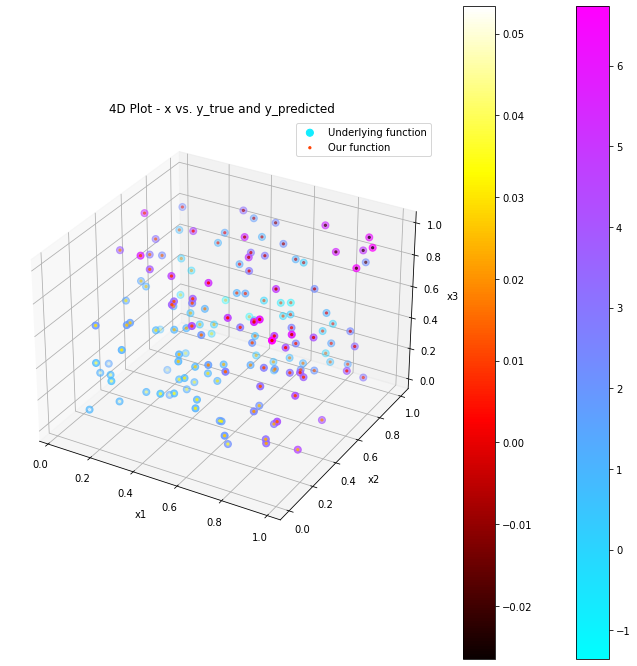

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter_fig = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_true, cmap='cool', label='Underlying function', s=50)
fig.colorbar(scatter_fig)
scatter_fig = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_predicted.detach().numpy(), cmap='hot', label='Our function', marker='.')
fig.colorbar(scatter_fig)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('4D Plot - x vs. y_true and y_predicted')

plt.legend()
plt.show()